# R Basics: second demo

## Save the Output

In [1]:
## this library contains utilities to write and read text files in R
library(readr)
library(tidyverse)
data(mpg)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ dplyr   1.0.0
✔ tibble  3.0.1     ✔ stringr 1.4.0
✔ tidyr   1.1.0     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



A series of R objects can be saved as binary (compressed) file `.RData`

In [2]:
## RData format
save(mpg, file = "mpg.RData")

The previous type of file can be read only by R. It can be handy to have a more "human" type of output.
For example, a table can be saved as comma separated file "excel friendly"

In [3]:
## as an alternative you can save as csv
write_csv(mpg, path = "mpg.csv")

## Plotting with pipes ...

Let's get some data in ...

In [4]:
## Load the wines data
wines <- read_csv("data/wines.csv") 

Parsed with column specification:
cols(
  alcohol = col_double(),
  malic_acid = col_double(),
  ash = col_double(),
  ash_alkalinity = col_double(),
  magnesium = col_double(),
  tot._phenols = col_double(),
  flavonoids = col_double(),
  non.flav._phenols = col_double(),
  proanth = col_double(),
  col._int. = col_double(),
  col._hue = col_double(),
  OD_ratio = col_double(),
  proline = col_double(),
  class = col_character()
)



## Assignment 5
1. Get the wines data into R (wines.csv)
2. make a text summary of your data (`summary()`)
3. Plot the relation between proanthocyanidins and total phenols for the three types of wines.
4. Can you do a boxplot of the different properties of the wines (also here remember wide and narrow data.frames)?

... more or less everything you need to complete the assignment is scattered somewhere between this practical and the first one!

## Data Carpentry: Select, filter, mutate ...

The first and fast thing to do is to plot the data "piping" the data into ggplot

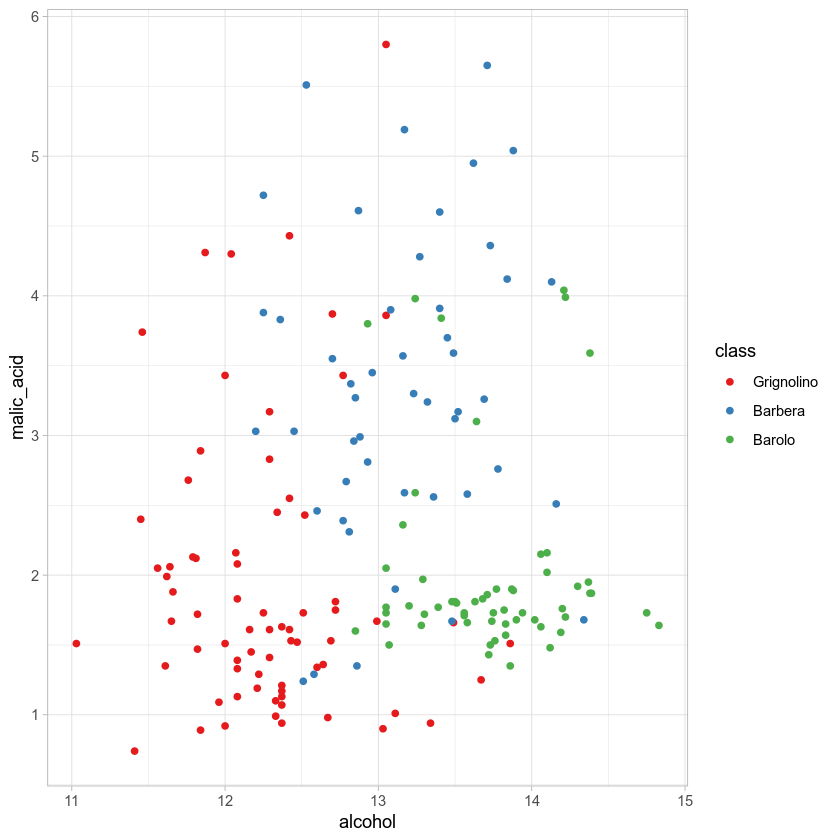

In [12]:
wines %>% 
  mutate(class = factor(class, levels = c("Grignolino","Barbera","Barolo"))) %>% 
  ggplot() +
  geom_point(mapping = aes(x = alcohol, y = malic_acid, col = class)) +
  scale_color_brewer(palette = "Set1") + 
  theme_light()

Suppose now that we want to plot the data only of Barbera ... here the pipe is used to manipulate "on the fly" the wines dataset 

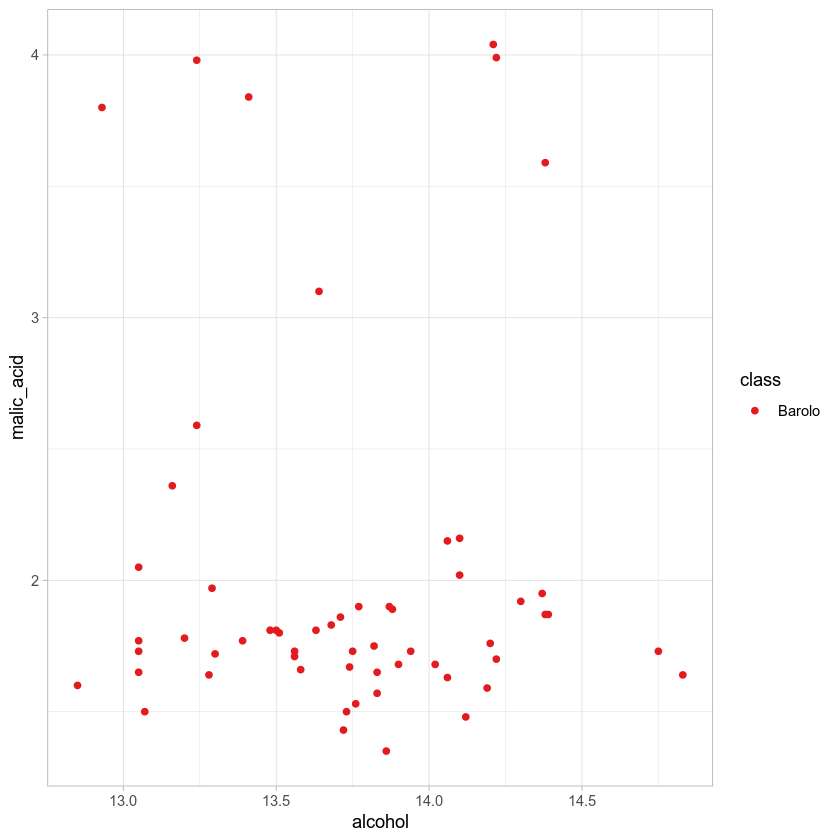

In [13]:
wines %>% 
  select(alcohol,malic_acid,class) %>% 
  filter(class == "Barolo") %>% 
  ggplot() +
  geom_point(mapping = aes(x = alcohol, y = malic_acid, col = class)) +
  scale_color_brewer(palette = "Set1") + ## this is a nice color scheme ;-)
  theme_light()

An additional "joint" of the pipe can be used to calculate derived quantities

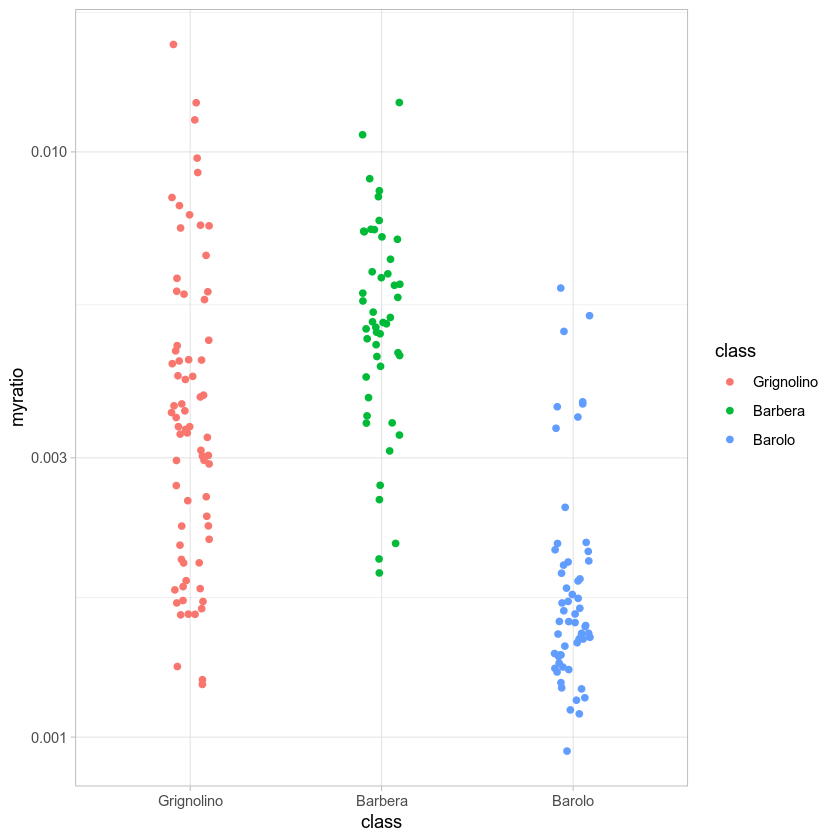

In [14]:
wines %>% 
  select(class,malic_acid,proline) %>% 
  mutate(myratio = malic_acid/proline) %>% 
  mutate(class = factor(class, levels = c("Grignolino","Barbera","Barolo"))) %>% 
  ggplot() + 
  geom_jitter(mapping = aes(x = class, y = myratio, col = class), width = 0.1) +
  scale_y_log10() +
  theme_light()

And, finally, also gather can be included in the pipe. can you comment the different lines of code? 


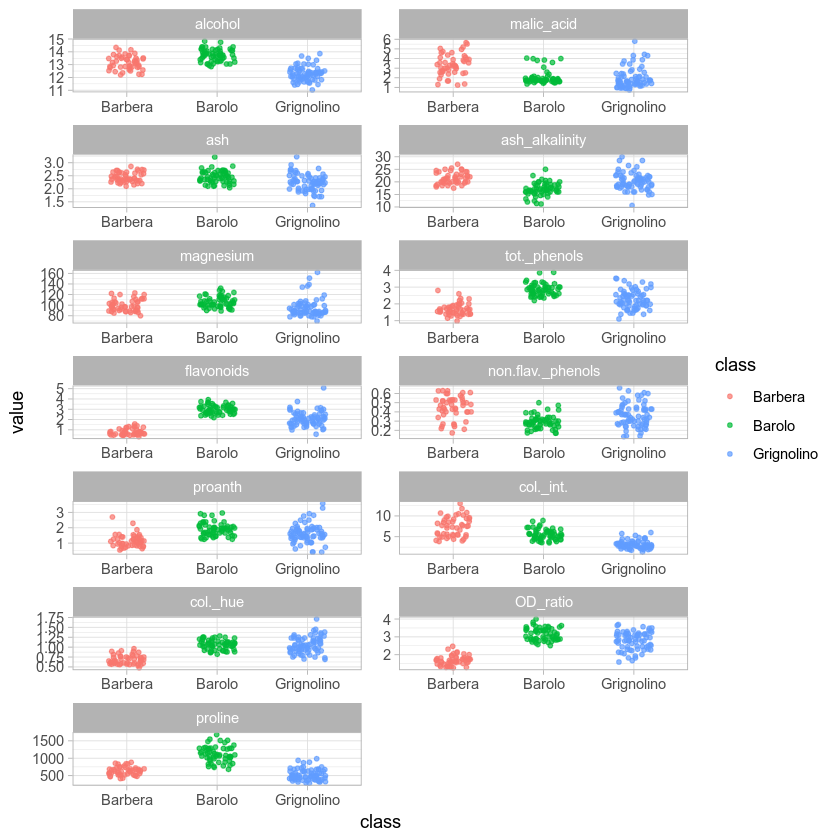

In [18]:
wines %>% 
  pivot_longer(alcohol:proline, names_to = "parameter", values_to = "value") %>% 
  mutate(parameter = factor(parameter, levels = unique(parameter))) %>% 
  ggplot() + 
  geom_jitter(mapping = aes(x = class, y = value, col = class), 
              width = 0.2, size = 1, alpha = 0.7) + 
  facet_wrap(~parameter, scales = "free", ncol = 2) + 
  theme_light()

## Assignment #6
1. Load the iris data 
2. Calculate the ratios sepal.width/sepal.length and petal.width/petal.length (with **mutate()**!)
3. Plot the two ratios for all the iris variety
4. Save the modified table as .csv
5. Open it with Excel and see if you managed to save the new columns

**Important** Everything should be done with pipes! So only one command!



